In [31]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
import os

/home/innoacad04


In [40]:
srgan = tf.keras.models.load_model(os.getenv('HOME') + '/model/srgan_G.h5')
srgan

In [17]:
import tensorflow_datasets as tfds
train, valid = tfds.load(
    "div2k/bicubic_x4", 
    split=["train","validation"],
    as_supervised=True
)

(1356, 2040, 3) (339, 510, 3)


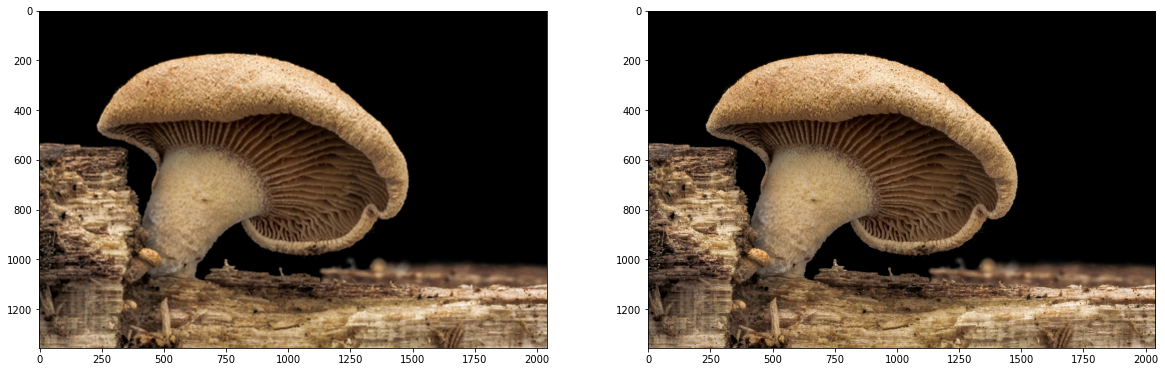

In [26]:
for i, (lr, hr) in enumerate(valid):
    if i == 7: break
    
# 저해상도 이미지를 고해상도 이미지 크기로 bicubic interpolation 합니다.  
hr, lr = np.array(hr), np.array(lr)
print(hr.shape, lr.shape)
bicubic_hr = cv2.resize(
    lr,
    dsize=(hr.shape[1], hr.shape[0]), # 고해상도 이미지 크기로 설정
    interpolation=cv2.INTER_CUBIC # bicubic 설정
)

# 저해상도 및 고해상도 이미지를 시각화합니다.
plt.figure(figsize=(20,10))
plt.subplot(1,2,1); plt.imshow(bicubic_hr)
plt.subplot(1,2,2); plt.imshow(hr)

Text(0.5, 1.0, 'HR')

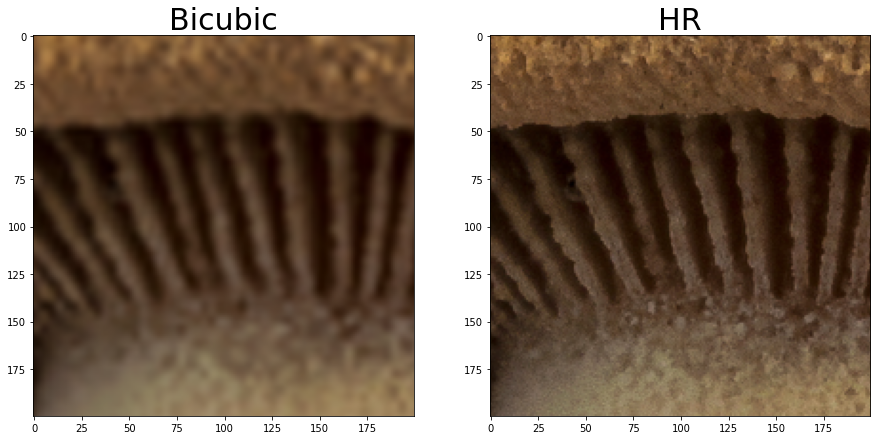

In [27]:
# 이미지의 특정 부분을 잘라내는 함수를 정의합니다.
def crop(image, left_top, x=200, y=200):
    return image[left_top[0]:(left_top[0]+x), left_top[1]:(left_top[1]+y), :]

# interpolation된 이미지와 고해상도 이미지의 동일한 부분을 각각 잘라냅니다.
left_top = (400, 500)
crop_bicubic_hr = crop(bicubic_hr, left_top)
crop_hr = crop(hr, left_top)

# 잘라낸 부분을 시각화 합니다.
plt.figure(figsize=(15,25))
plt.subplot(1,2,1); plt.imshow(crop_bicubic_hr); plt.title("Bicubic", fontsize=30)
plt.subplot(1,2,2); plt.imshow(crop_hr); plt.title("HR", fontsize=30)

In [41]:
def apply_srgan(image):
    image = tf.cast(image[np.newaxis, ...], tf.float32)
    sr = srgan.predict(image)
    sr = tf.clip_by_value(sr, 0, 255)
    sr = tf.round(sr)
    sr = tf.cast(sr, tf.uint8)
    return np.array(sr)[0]

In [42]:
srgan_hr = apply_srgan(lr)
srgan_hr

NotFoundError:  No algorithm worked!
	 [[node model_3/conv2d_26/Conv2D (defined at <ipython-input-41-dbe6c07fb4a8>:3) ]] [Op:__inference_predict_function_4120]

Errors may have originated from an input operation.
Input Source operations connected to node model_3/conv2d_26/Conv2D:
 model_3/lambda_2/truediv (defined at <ipython-input-31-b150b6f5b73f>:7)

Function call stack:
predict_function
